In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print ("The training data set is:\n")
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

The training data set is:

(55000, 784)
(55000, 10)


In [4]:
print ("The test data set is:")
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

The test data set is:
(10000, 784)
(10000, 10)


In [5]:
mnist.train.images[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
mnist.train.images[5].shape

(784,)

In [10]:
# option 1
img = np.reshape(mnist.train.images[5], [28,28])
# option 2
img = mnist.train.images[5].reshape([28,28])

img.shape

(28, 28)

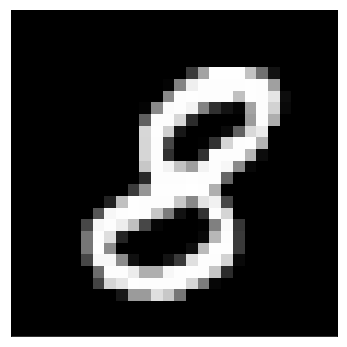

In [11]:
plt.figure(figsize = (6,6))
plt.imshow(img, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [13]:
np.argmax(mnist.train.labels[5])

8

In [14]:
x, y = mnist.train.next_batch(3) # 3개만 불러오겠다

# 실제 3개만 불러왔는지 확인
print(x.shape)
print(y.shape)

(3, 784)
(3, 10)


In [15]:
# ANN with TensorFlow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


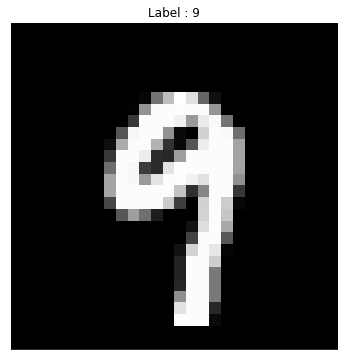

In [30]:
train_x, train_y = mnist.train.next_batch(1) # random한 값 1개를 불러옴
img = train_x[0,:].reshape(28,28)

plt.figure(figsize=(6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[0,:])))
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
print ('Train labels : {}'.format(train_y[0, :]))

Train labels : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [32]:
# Define an ANN Structure
n_input = 28*28
n_hidden = 100
n_output = 10

In [33]:
weights = {
    'hidden' : tf.Variable(tf.random_normal([n_input, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden, n_output], stddev = 0.1))
}

biases = {
    'hidden' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

In [34]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [35]:
def build_model(x, weights, biases):
    # first hidden layer
    hidden = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
    # non-linear activate function
    hidden = tf.nn.relu(hidden)
    # Output layer
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])
    return output

In [36]:
# Define Loss
pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)
loss = tf.reduce_mean(loss)

LR = 0.0001
optm = tf.train.AdamOptimizer(LR).minimize(loss)

In [37]:
n_batch = 50     # Batch Size
n_iter = 5000    # Learning Iteration
n_prt = 250      # Print Cycle

Iter : 0
Cost : 2.730370283126831
Iter : 250
Cost : 1.3063130378723145
Iter : 500
Cost : 0.8646090626716614
Iter : 750
Cost : 0.5171763896942139
Iter : 1000
Cost : 0.47700828313827515
Iter : 1250
Cost : 0.45620590448379517
Iter : 1500
Cost : 0.5308222770690918
Iter : 1750
Cost : 0.3100418746471405
Iter : 2000
Cost : 0.32243451476097107
Iter : 2250
Cost : 0.251227468252182
Iter : 2500
Cost : 0.25813016295433044
Iter : 2750
Cost : 0.2408662736415863
Iter : 3000
Cost : 0.3514455556869507
Iter : 3250
Cost : 0.23157243430614471
Iter : 3500
Cost : 0.17545318603515625
Iter : 3750
Cost : 0.6262792944908142
Iter : 4000
Cost : 0.15979191660881042
Iter : 4250
Cost : 0.2658984363079071
Iter : 4500
Cost : 0.3527849316596985
Iter : 4750
Cost : 0.36696720123291016


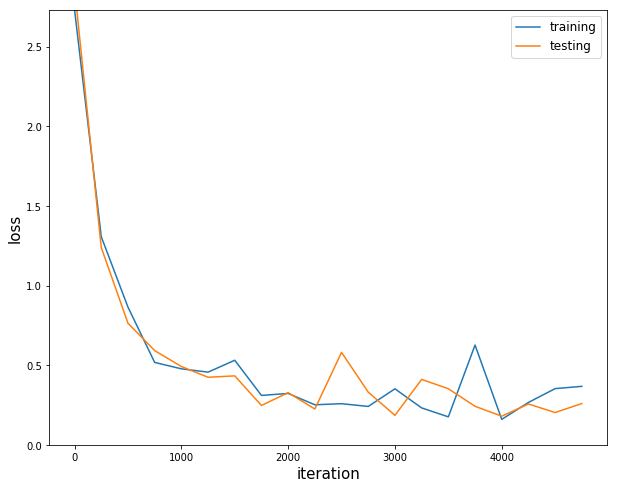

In [38]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    sess.run(optm, feed_dict = {x: train_x, y: train_y}) 
    
    if epoch % n_prt == 0:
        test_x, test_y = mnist.test.next_batch(n_batch)
        c1 = sess.run(loss, feed_dict = {x: train_x, y: train_y})
        c2 = sess.run(loss, feed_dict = {x: test_x, y: test_y})
        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c1))
        
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, 
         loss_record_train, label = 'training')
plt.plot(np.arange(len(loss_record_test))*n_prt, 
         loss_record_test, label = 'testing')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [39]:
# Test or Evaluate
test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict = {x : test_x})
my_pred = np.argmax(my_pred, axis = 1)

labels = np.argmax(test_y, axis = 1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 94.0%


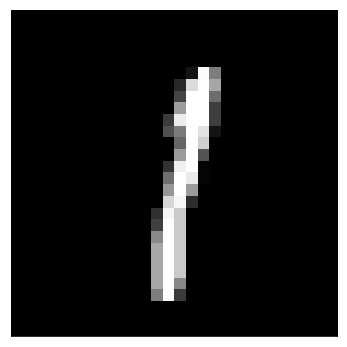

Prediction : 1
Probability : [0.   0.96 0.   0.01 0.   0.   0.   0.01 0.01 0.  ]


In [40]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict = {x : test_x})
predict = np.argmax(logits)

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision = 2, suppress = True)
print('Probability : {}'.format(logits.ravel()))

In [41]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>